Deibin Andrey Rojas Tellez

* Dataset Regresión Lineal – Vehicle dataset / Car details v3

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. Dividir el dataset en Train y Test para evaluar correctamente el modelo. Entrenar el modelo configurando los diferentes hiperparámetros. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. Interpretar, analizar y documentar los resultados obtenidos.

In [4]:
pip install numpy pandas scikit-learn metplotlib

Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
df = pd.read_csv('./Car details v3.csv')

In [10]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


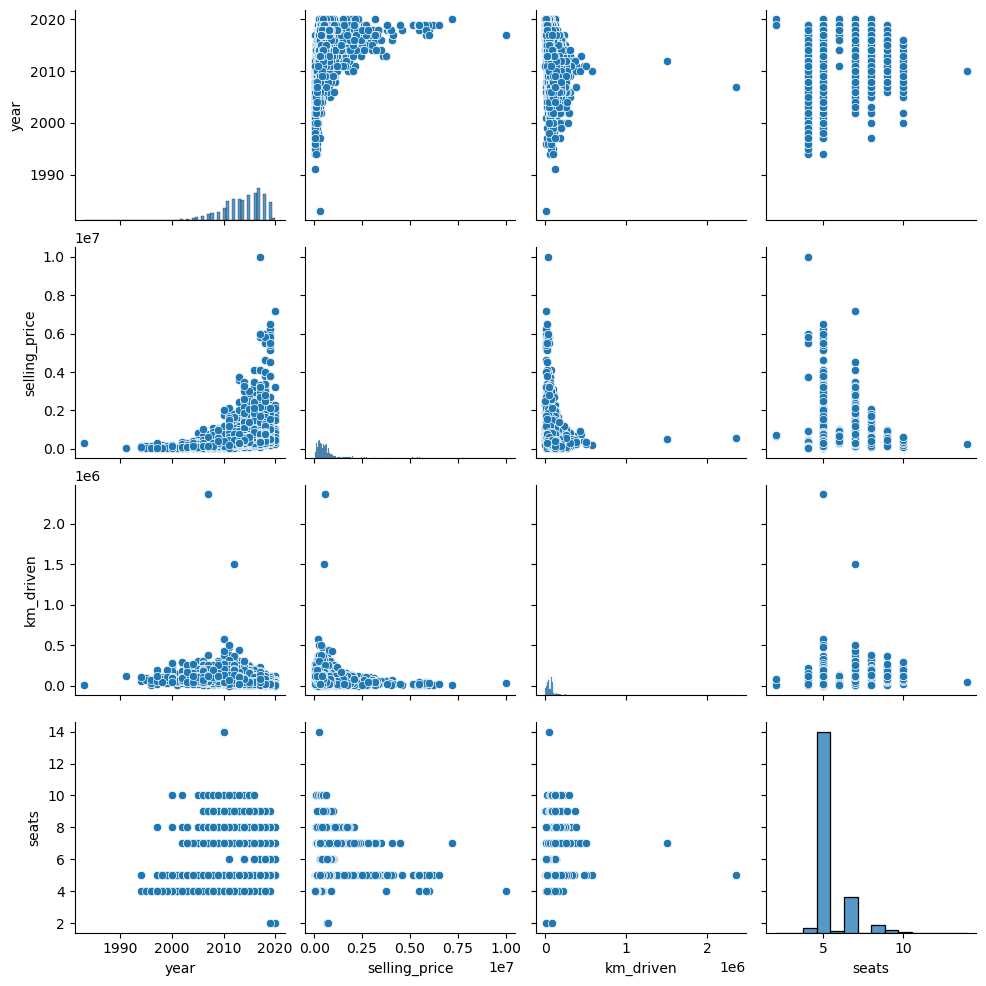

In [12]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Identificación de Datos Atípicos de kilómetros recorridos.')

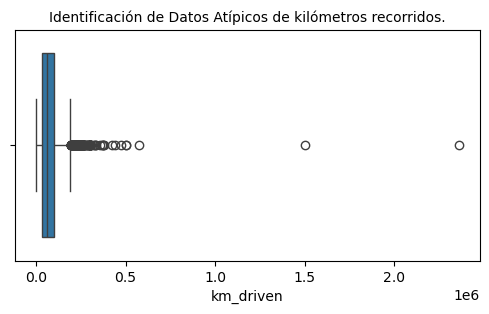

In [14]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=df ['km_driven'])
plt.title ('Identificación de Datos Atípicos de kilómetros recorridos.',fontsize=10 )

Text(0.5, 1.0, 'Identificación de datos faltantes y atipicos en el año')

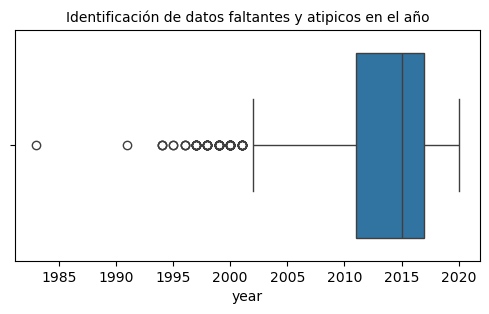

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df ['year'])
plt.title('Identificación de datos faltantes y atipicos en el año', fontsize=10)   

Text(0.5, 1.0, 'Identificación de datos faltantes y típicos en los asientos')

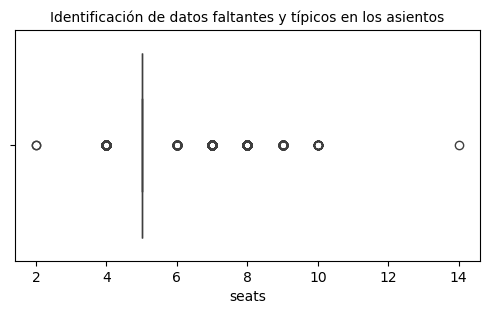

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df ['seats'])
plt.title('Identificación de datos faltantes y típicos en los asientos', fontsize=10 )

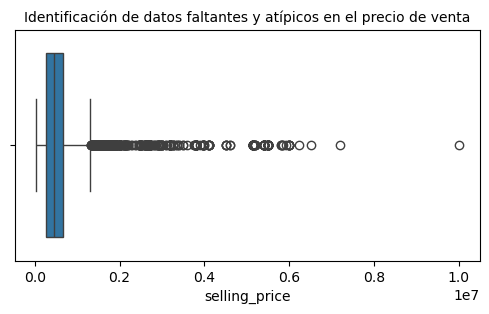

In [20]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['selling_price'])
plt.title('Identificación de datos faltantes y atípicos en el precio de venta', fontsize=10)
plt.show()

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [27]:
# Codificando variables categóricas
df = pd.get_dummies(df, columns=['fuel'])

# Convirtiendo los valores de las columnas 'engine', 'mileage', 'max_power' y 'torque' a str
df['engine'] = df['engine'].astype(str)
df['mileage'] = df['mileage'].astype(str)
df['max_power'] = df['max_power'].astype(str)
df['torque'] = df['torque'].astype(str)

Text(0.5, 1.0, 'Relación entre año y precio de venta')

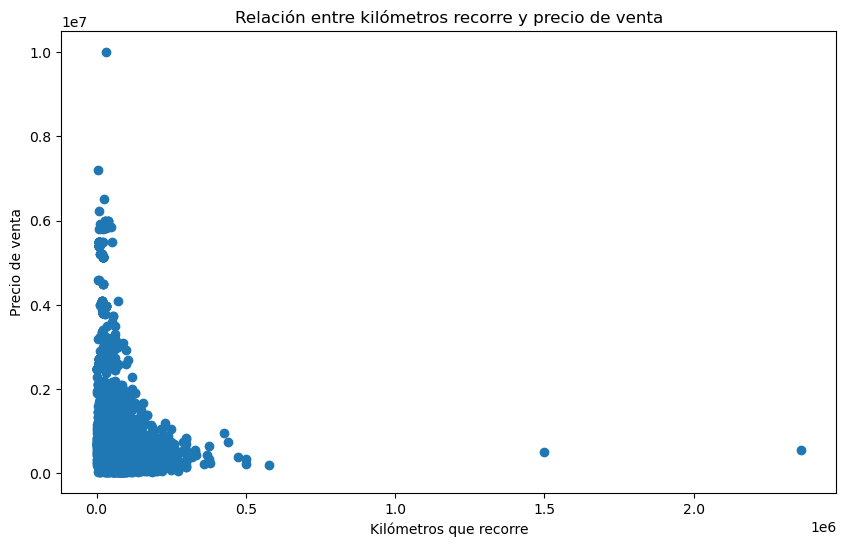

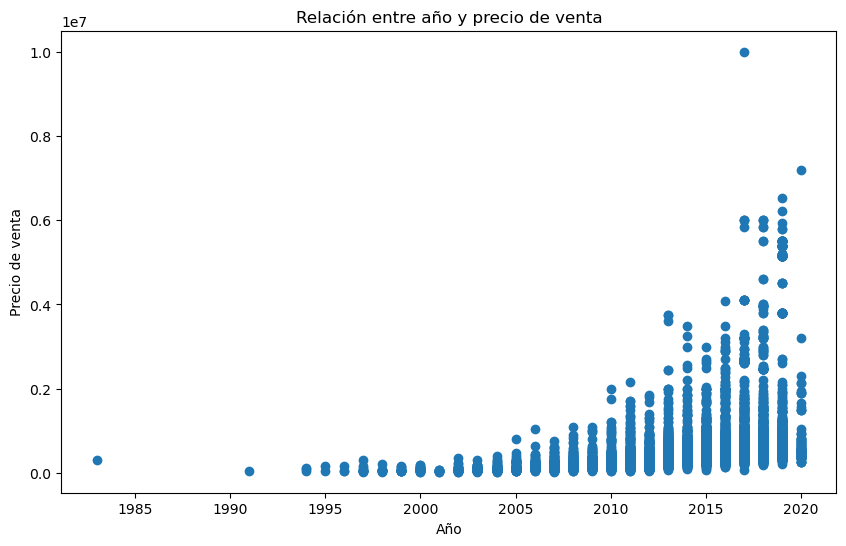

In [29]:
# Graficos de las relaciones que me interesan tratar.

plt.figure(figsize=(10, 6))
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilómetros que recorre')
plt.ylabel('Precio de venta')
plt.title('Relación entre kilómetros recorre y precio de venta')

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Relación entre año y precio de venta')

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

 Las caracteristicas principales seran el Año y los kilometraje srecorridos, ya que quiero como influye el precio segun del año de un vehiculo (ya sea nuevo o viejo) ademas de como el precio influye segun los kilometros que ha recorrido o puede recorrer un auto..

In [36]:
anos_y_kilometros = df[['year', 'km_driven']]

# Muestra los datos
print(anos_y_kilometros)

      year  km_driven
0     2014     145500
1     2014     120000
2     2006     140000
3     2010     127000
4     2007     120000
...    ...        ...
8123  2013     110000
8124  2007     119000
8125  2009     120000
8126  2013      25000
8127  2013      25000

[8128 rows x 2 columns]


In [52]:
# Calcule el coeficiente de correlación entre 'año' y 'precio_de_venta'
correlation = df['year'].corr(df['selling_price'])
print('Correlación entre año y precio de venta:', correlation)

Correlación entre año y precio de venta: 0.4140918605571504


In [54]:
# Calcular el coeficiente de correlación entre 'kilometros_recorridos' y 'precio_venta'
correlation = df['km_driven'].corr(df['selling_price'])
print('Correlación entre kilómetros recorridos y precio de venta:', correlation)

Correlación entre kilómetros recorridos y precio de venta: -0.2255337555721895


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [46]:
X = df[['year', 'km_driven']]
y = df['selling_price']

# Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
print("Train dataset:")
print(X_train.head())
print(y_train.head())

Train dataset:
      year  km_driven
6518  2019       2560
6144  2013      80000
6381  2011     150000
438   2013     120000
5939  2017      25000
6518    520000
6144    300000
6381    380000
438     530000
5939    335000
Name: selling_price, dtype: int64


In [50]:
print("\nTest dataset:")
print(X_test.head())
print(y_test.head())


Test dataset:
      year  km_driven
1971  2004     110000
4664  2014     291977
5448  2016      70000
3333  2006     120000
2316  2013      69000
1971    198000
4664    500000
5448    425000
3333    150000
2316    525000
Name: selling_price, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros

In [58]:
model = LinearRegression()
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)
print (y_test)

1971     198000
4664     500000
5448     425000
3333     150000
2316     525000
         ...   
1149    5500000
5002     370000
6008     374000
2283     575000
5428     140000
Name: selling_price, Length: 1626, dtype: int64


In [60]:
predicciones = model.predict(X_test)
r2 = model.score(X_test, y_test)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.1764350686520122


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [73]:
# predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 539833998161.5463
Error absoluto medio (MAE): 391277.6561473786
Coeficiente de determinación (R^2): 0.1764350686520122


7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

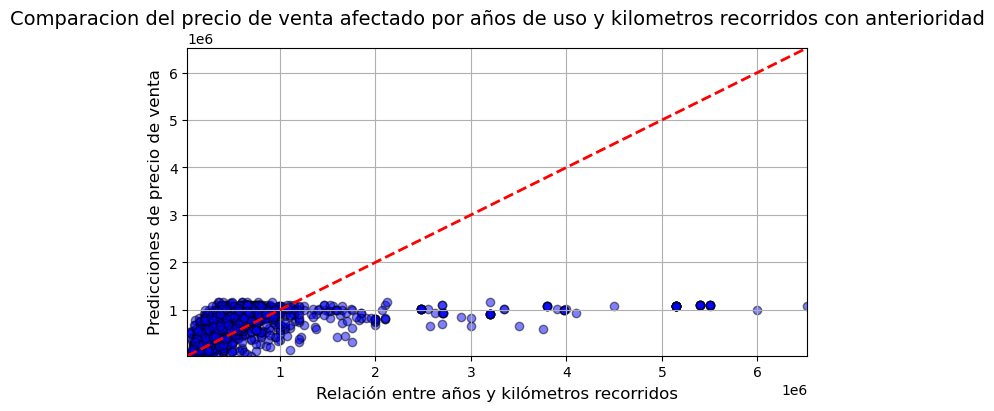

In [122]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k')
plt.xlabel("Relación entre años y kilómetros recorridos", fontsize=12)
plt.ylabel("Predicciones de precio de venta", fontsize=12)
plt.title("Comparacion del precio de venta afectado por años de uso y kilometros recorridos con anterioridad", fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.grid(True)
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.show()

Text(0.5, 1.0, 'Gráfica de residuos')

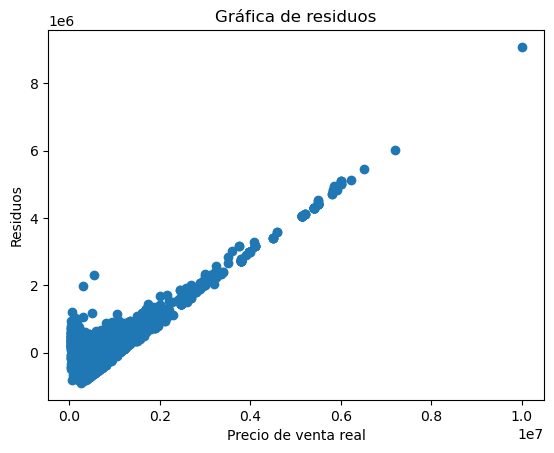

In [82]:
residuals = df['selling_price'] - model.predict(df[['year', 'km_driven']])
plt.scatter(df['selling_price'], residuals)
plt.xlabel('Precio de venta real')
plt.ylabel('Residuos')
plt.title('Gráfica de residuos')

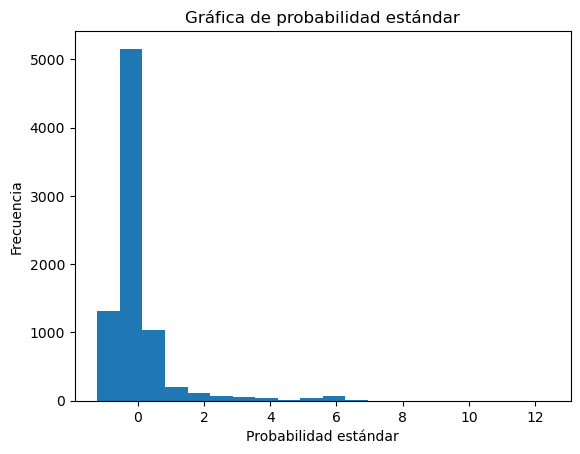

In [84]:
# Gráfica de probabilidad estándar
plt.hist(residuals / np.std(residuals), bins=20)
plt.xlabel('Probabilidad estándar')
plt.ylabel('Frecuencia')
plt.title('Gráfica de probabilidad estándar')
plt.show()

Text(0.5, 1.0, 'Gráfica de dispersión entre el año y el precio de venta')

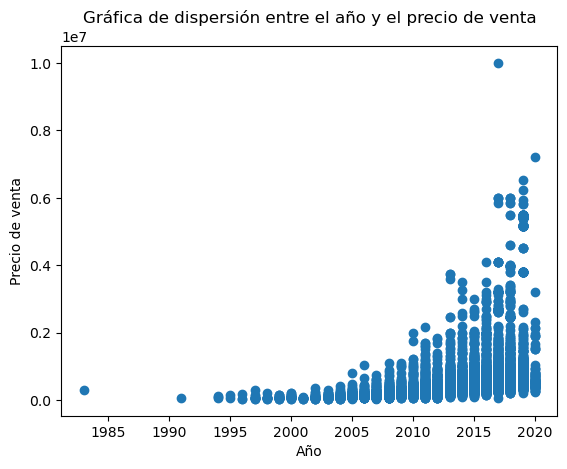

In [88]:
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Gráfica de dispersión entre el año y el precio de venta')

Text(0.5, 1.0, 'Gráfica de dispersión entre los kilómetros recorridos y el precio de venta')

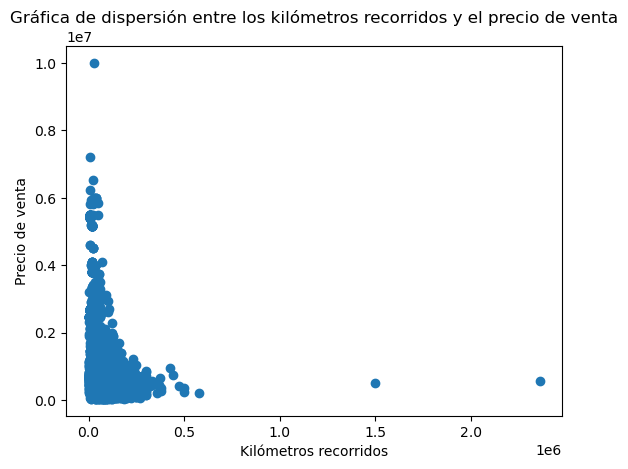

In [90]:
plt.scatter(df['km_driven'], df['selling_price'])
plt.xlabel('Kilómetros recorridos')
plt.ylabel('Precio de venta')
plt.title('Gráfica de dispersión entre los kilómetros recorridos y el precio de venta')

8. Interpretar, analizar y documentar los resultados obtenidos

En esta actividad observamos como un carro puede verse afectado su precio por el desgaste (kilómetros recorridos) y en parte dependiendo en el año que tenga el vehículo puede afectarse su valor económico por lo que se me pareció necesario indagar que probabilidad hay que sea vendido y aproximar su valor y claro está que los modelos más antiguos como aquellos que han recorrido kilómetros anteriormente poseen una menor tasa de venta o bueno su precio es mas baratos, en cambio si no tiene kilómetros ya recorridos con anterioridad podemos asumir que es más costoso por que puede tratarse de un nuevo auto como posiblemente tenga una fecha de salida más reciente.
•	Correlación moderada de 0.414 entre el año y el precio de venta. Esto significa que los autos más nuevos tienden a venderse a precios más altos, probablemente porque son más atractivos y tienen menos desgaste. Sin embargo, la relación es moderada, por lo que el año no es el único factor en juego.
•	La correlación negativa de -0.226 entre los kilómetros recorridos y el precio de venta sugiere que los autos con más kilometraje suelen tener precios más bajos ya que a mayor kilometraje, más desgaste y menos atractivo para los compradores.
•	Error Cuadrático Medio (MSE): 539,833,998,161.5463. Este valor tan alto indica que el modelo tiene un margen de error bastante grande, lo que significa que podría no estar capturando todas las relaciones entre las variables y el precio.
•	Error Absoluto Medio (MAE): 391,277.6561. Este error también es considerable y refleja que las predicciones se desvían en promedio por cientos de miles de unidades monetarias del valor real, lo cual no es ideal para una estimación precisa de precios.
•	Coeficiente de Determinación (R²): 0.1764. Este valor bajo sugiere que el modelo solo está explicando el 17.64% de la variabilidad del precio de venta, esto confirma que el modelo necesita ajustes o incluir otras características para mejorar su precisión
